# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

The smart car does not move in the simulation.  It receives rewards ranging from 0.73 to 1.35 for idling at a red light.  It receives negative rewards for idling at a green light.  The rewards also change based on the relative location of the destination.  Idling at a red light when the vehicle could have got closer to the destination by turning right yields a smaller reward.   

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**
#### agent: 
    - epsilon; exploration factor which dictates what percentage of the time a random action.  Random actions are necessary in order to explore actions that are not ideal based on current Q values but which may prove to be optimal after some iterations. 
    - alpha : controls how quickly Q values are changed by learning.  0 would mean no learning and 1 would mean learning assumed to be infallible. That is, the last Q value is forgotten and replaced with the new Q value.   
    - learning: whether the agent is expected to learn using q learning or simply choose random actions. 
#### environment
    -The act function is called when an agent performs an action: this function contains the rewards and penalties of different state, action combinations and calls other functions to effect the appropriate changes required to transition from one state to the next. 
#### simulator
    -Render displays abbreviated text in the GUI while render_text displays a more verbose form of the output in the command prompt.
#### planner
    -Planner will consider East-West direction first, then north-south.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


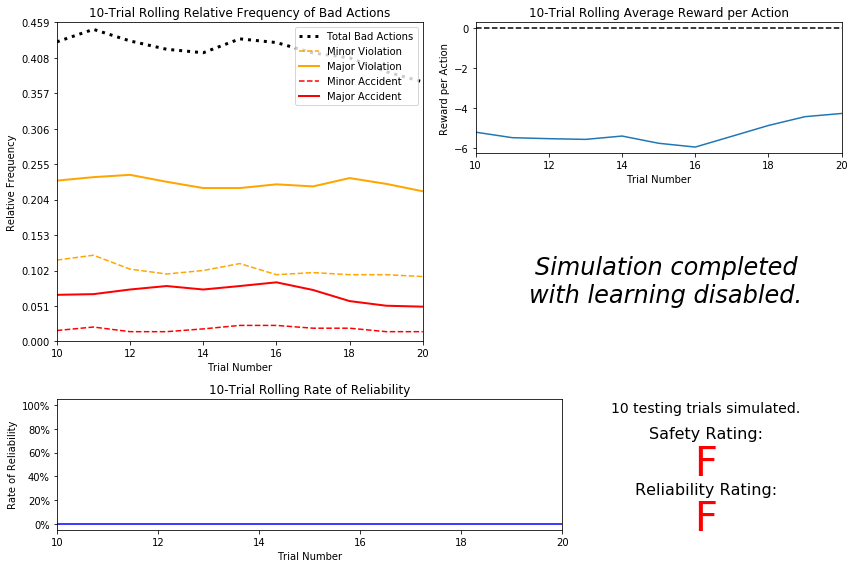

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

We may glean from the bad action frequency graph that random actions constitute bad actions at least 40% of the time.  Of these bad actions, 8%/40% = 20% lead to accidents. 

Further, we may notice from the 10-trial rolling average reward per action graph that the agent is being penalized heavily.  If we assume that optimal actions lead to a 2 point reward and that this is occuring 60% of the time.  Then in order to have a -5 point average the agent must be getting a negative reward of -15.5 points per bad action.  This is a grievous penalty, for it is at least 7 times larger in magnitude than the reward for a good action.

All three charts show no substantial change as the number of trials increases.  The 10-trial roling rate of reliability shows this most poignantly, illustrating that not once did the Smartcab ever arrive at its destination.  This is consistent with the lack of a mechanism for learning.  Since the agent is forced to act randomly at every step, it is highly unlikely that it will arrive at its destination by chance.  The probability of arriving by chance decreases the farther the distance of the destination from the starting position (this can be seen from the perspective of a 2-d random walk).  




-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**
Only waypoint, light, left, and oncoming are relevant.  

On the matter of efficiency, or "reliability", as it is called elsewhere in the project, if we assume that following the waypoint at every opportunity will allow us to get to our destination using the smallest number of steps, then we don't need the deadline.  If deviating from the waypoint, however, sometimes yields a shorter number of steps before reaching the destination, then exploring these plans randomly could lead to unexpected optimal policies.  That said, after looking at the simulation code, it is clear that the color of the traffic lights and the traffic light delays are chosen at random.  We cannot, therefore, hope to do much better on average than by following the waypoint, which is determined using the route that minimizes the Manhattan distance between the origin and the destination.  In this case, knowing the deadline will not help us determine the optimal policy and including it would blow up  the size of our state-space. 

On the matter of safety, the Smartcab only needs to consider the left and oncoming vehicles and their intended directions of travel.  There is no state in which the actions of vehicle to the right, as long as the vehicle is following the US right-of-way rules, will impact the optimal policy for said state.  If the light is green, I may turn right, move forward, or turn left without regard for the vehicle to my right.  In every case either I have the right of way and the vehicle must yield, or our paths do not intersect.  If the light is red, I can only turn right. In that case, my path and that of the vehicle to my right  will never intersect.

The same cannot be said, however, of the left and oncoming vehicles.  If the light is green and I turn left when there is an oncoming vehicle driving forward, we collide.  If the light is red and I turn right when there is a vehicle moving forward to my left, we collide.  

The light itself is necessary because it is used as a signal for all agents and removing it from our calculations would be perverse, if only because running a red light would be in violation of traffic laws. 


### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**
For state space ('waypoint','light','left','oncoming') the number of combinations is 4\*2\*4\*4 = 128 states.
If each state is equally likely to occur and we want the agent to be exposed at least 10 times to each state then 128\*10 states/(10 states / trial)= 128 trials.  

The agent can most definitely learn a policy for each possible state if the decay function of epsilon is chosen judiciously so that enugh training trials are undergone.  Since the waypoint and the lights are independently and uniformly selected--waypoint is random since destination is chosen randomly--, we are almost certainly bound to encounter all combinations of these two attributes.  Further, since there are on average 100 dummies/48 intersections = 2 dummies/intersection.  This makes it likely that we will encounter the 4 combinations of (left, oncoming) that we need for our agent.  There are 3 other spots at the intersection so of the times when there are two other vehicles at the intersection, the most common number, the left and oncoming spots should be occupied on average 1/3 of the time, right and oncoming 1/3, and left and right another 1/3. It should not be too rare for there to be 1 other car at the intersection, at which point 2/3 of the time a car will be in a spot useful for learning,i.e., left or oncoming.  

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

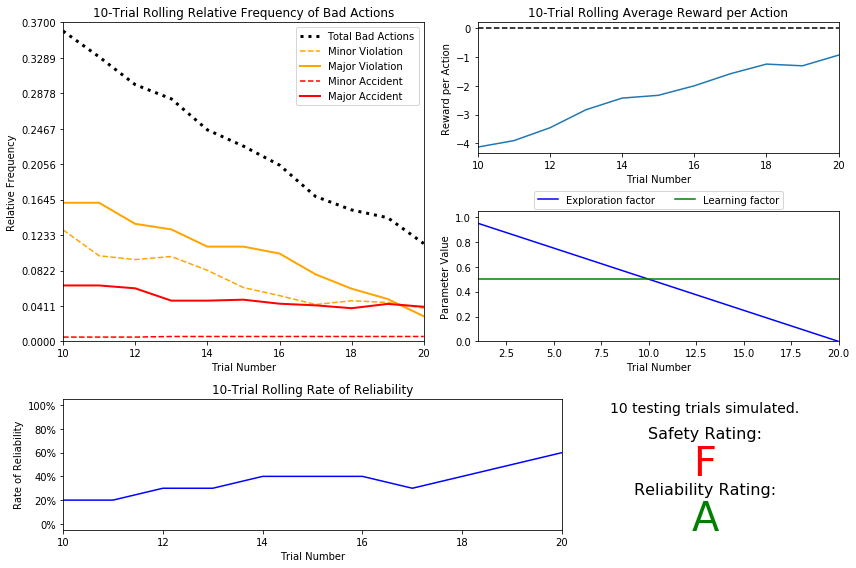

In [17]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**
Most of the metrics reported for the simulation using the Q-Learning metric showed improvement over time, in contrast to the metrics reported for the basic driving agent.  The frequency of minor and major accidents, however, showed the least improvement over time, remaining relatively stable, not unlike the behavior observed for the basic driving agent.  One hypothesis that may explain this is that there are man more states in which traffic violations may be made than there are states in which accidents may happen. In order to commit a violation, the state only needs to include a red light for example.  On the other hand, in order for an accident to happen, you need there to be a red light AND an approaching vehicle from either the left or the right.  Therefore, since more states can be encountered with the potential for violations in a given list of states visited, the appropriate behavior for avoiding violations may be more quickly learned than the behavior necessary to avoid an accident. 

In this simulation, 20 trials were conducted before testing.  This number makes sense given the epsilon decay and tolerance. The number of trials required is merely (1-0.05)/0.05 + 1. 

The paramter accurately represents linear decay with a slope of -0.05.

As the number of trials increased, the frequency of bad actions did decrease substantially from ~0.37 to ~0.12.  The frequency of violations, however, as alluded to in the first paragraph, decreased much more than that of accidents.  As expected, the average reward per action did increase as the number of trials increased.  Moreover, the average reward did not reach ~2 or even cross the zero mark, indicating that the agent was still making too many mistakes; the expected reward should be about 2 when the optimal policy is being followed.  The expected reward of the optimal policy may be deduced from the logic in environment.py
```python

 # Did the agent attempt a valid move?
        if violation == 0:
            if action == agent.get_next_waypoint(): # Was it the correct action?
                reward += 2 - penalty # (2, 1)
            elif action == None and light != 'green' and agent.get_next_waypoint() == 'right':
                # valid action but incorrect (idling at red light, when we should have gone right on red)
                reward += 1 - penalty # (1, 0)
            elif action == None and light != 'green': # Was the agent stuck at a red light?
                reward += 2 - penalty # (2, 1)
            else: # Valid but incorrect
                reward += 1 - penalty # (1, 0)
```
The rate of reliability did increase substantially, from F to A.  However, the safety rating did not change.  The reason for the apparently disproportionate improvement in reliability is that our standards for the highest safety rating are much greater than the standards for reliability.  Although the agent may not make it to the destination within the deadline up to 10% of the time and still get an A in reliability, the agent gets an F if the Smartcab gets into even one major accident.  It is clear that a different epsilon decay function needs to be applied if the agent is to have enough learning trials to learn the optimal policy for avoiding accidents.  Again, the reason we need more trials is because the states in which an accident may occur are comparatively rarer than those in which violations may occur.  Based on this observation, it is unlikely the agent will get a high safety rating if the average reward has not at least passed the zero-mark. 









-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

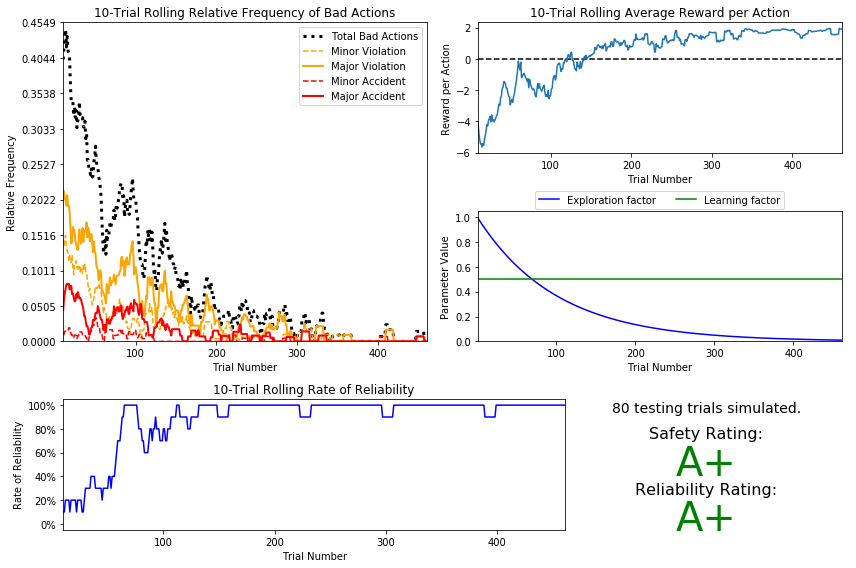

In [74]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**
The decaying function employed for epsilon in this case was inspired by the equation that describes the charging of a capacitor.   The equation is shown in the image below taken from the [Georgia State hyperphysics site](http://hyperphysics.phy-astr.gsu.edu/hbase/electric/capchg.html) (accessed August 3, 2017):

![Capacitor charging illustration](capacitor.gif)

I chose this decay function because it allowed me to directly specify the approximate number of trials I wanted to conduct in the form of a parameter, R:

$$ N=\textrm{ Approx. Number of Trials} \hspace{25px} R = \frac{N}{4} \hspace{25px} t_i=R * \log{\frac{1}{\epsilon_i}} \hspace{25px} t_{i+1}=t_i + 1 $$

$$ \epsilon_{i+1}= {\epsilon^{-{t_{i+1}}/{R}}}$$

My implementation of this could be more elegant, I could simply keep track of t instead of calculating it at each iteration.  However, I didn't want to add any arguments to the reset function or variables to the class.

About 450 trials were needed before commencing testing.  This was by design, as fewer trials did not result in a satisfactory leveling of the 10-trial rolling reward per action near the end of training.

After testing varous alpha parameters, I determined that 0.50 percent was best.  When I tried alpha parameters closer to 1, safety was improved but reliability suffered.  The opposite occured when I tried values closer to 0. 

This agent received the maximum safety and reliability ratings, far surpassing the default learner in safety (from F to A+) and making a small improvement in reliability (from A to A+).  The decay function employed for the optimized agent enables it to explore more at the beginning where there is much more uncertainty early on in the value iteration of the q-values for each state-action pair and furthermore, the slower decay enables the learner to spend more time learning overall; that is, the optimized learner goes through many more training trials (~450 vs 20) which enables it to sample a larger portion of the state space.  

Given that the agent met even the most stringent standards for 80 test trials, I am confident that this learner has learned the optimal policy for the most common and important states.  It has learned how to avoid accidents all together and wherever it may have calculated suboptimal policies, those states are not common enough for reliability to be impaired. 

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 
    The following table summarizes the optimal policies, assuming other cars will also obey US right-of-way rules. (In real life, there may be some stochasticity around the expected behavior of drivers competing for space on the road.  In other words, one has to drive assuming other drivers may, deliberately or accidentally, break the rules.)

| Waypoint 	| Light 	| Left 	| Oncoming | Policy |
|:-----:	|:------:	|:-----------:	| :--------: | :---------:| :---------:|
|   Forward|  Green | x  | x | Forward|
|   Left   	|  Green | x  | Right, Forward| None|
|   Left   | Green | x  | Left, None | Left |
|   Right  	| Green | x |  x | Right |
|   Forward   	| Red | x  | x | None |
|   Left  |  Red | x | x  | None| 
|Right |Red| Forward  | x | None |
|Right|Red | Left, Right, None  | x | Right|

 If we assume that the other cars will invariably respect the US right-of-way rules, then any time the light is green and we wish to move forward, we can safely drive forward without regard for oncoming cars or cars to our left. We may easily see why this is so by considering all the potential states in which we want to drive forward and the light is green.  
 
 If there are no cars either to our left or the oncoming lane, then there is no danger and we can drive forward. 
 
 If there is a car to our left, that car is seeing a red light and will not drive forward because it would be in violation of traffic rules.  If that car wants to turn right, it can do so without being in our way. On the other hand, if the car wants to turn left, it must again wait for a green light to avoid being in violation of traffic rules.  Therefore, there is no action that a car on our left can legally take to affect our decision of moving forward on a green light. 
 
 As for an oncoming vehicle, if the car wants to turn right it will not affect our path. If the vehicle wants to turn left, it may cause an accident if does turn left but according to the right-of-way rules we have precedence, so therefore we can drive forward regardless of the presence of an oncoming vehicle intending to turn left.  Lastly, if the oncoming vehicle is intending to drive forward, it will again not affect our path.  Therefore, the presence itself of an oncoming vehicle does not affect our decision to move forward on a green light.
 
 Anytime the policy for a Waypoint, Light pair is independent of the presence of a vehicle, the cell is marked as x in the table above. 
 
 Using similar reasoning, to which I will not tediously subject the reader, policies independent of the presence of other vehicles may be derived for other Waypoint, Light pairs: (Right, Green), (Forward, Red), (Left, Red)
 
 This is indeed what our agent has learned except for one conspicuous example.  
 
 For the most part our agent has learned to stop at a red light if it intends to move forward or left. 
 
 ('forward', 'red', 'forward', 'left')  
 -- forward : -37.45  
 -- right : -15.45  
 -- None : 2.42  
 -- left : -30.26  

('forward', 'red', 'right', 'right')  
 -- forward : -4.62  
 -- right : -0.02  
 -- None : 0.99  
 -- left : -20.28  
 
('left', 'red', None, 'forward')  
 -- forward : -10.45  
 -- right : 1.14  
 -- None : 1.79  
 -- left : -10.16  
 
('left', 'red', None, 'left')  
 -- forward : -10.38  
 -- right : 0.95  
 -- None : 1.64  
 -- left : -10.04  

  However, there is an example of a state where our agent did not learn the optimal strategy:
  
 ('forward', 'red', 'right', 'forward')  
 -- forward : -20.12  
 -- right : 0.46  
 -- None : 0.00  
 -- left : -7.15  

In this case, the q value for the 'None' action is 0, while the action 'right' is slightly larger at 0.46. Since all actions start with a q value of 0, it may be inferred that our agent did not have the opportunity to "try" waiting at the light and so never learned that in this particular state the optimal policy would actually be to wait at the light and move forward.  By turning right the agent would not incur the heavy penalty of an infraction or an accident, but it would simply waste the opportunity to make more progress toward the goal.  For this reason, our agent would have to be given more opportunities to encounter this state and randomly "try" waiting in order to calculate the optimal policy. This is an example of the local minima one may get stuck in if exploration, quantified by epsilon here, is not used in value iteration.

Another similar examples:

('right', 'green', 'right', 'forward')  
 -- forward : 0.67  
 -- right : 0.00  
 -- None : 0.00  
 -- left : 0.00  
 
 The most interesting cases are those of (Left, Green) and (Right, Red).  
 
 If the light is green and we intend to turn left, then, when there is an oncoming vehicle turning right or moving forward, the truly optimal policy would be to wait--in this case represented by None.  However, in the implementation of rewards for this environment the designers decided to assume that the Smartcab would wait for these vehicles to turn before turning left. As such, the optimal policy, by measure of the rewards implemented in this environement, is to turn left even when there is an oncoming vehicle moving forward or itself turning left.  At this point it is clear that information about the oncoming vehicle is unnecessary for learning because of the peculiar way in which the rewards were implemented. **For a simulation with a reduced state space see the cell below**
 
The block of code below shows where this decision about the implementation of rewards was made. 
 
```python
#From environment.py

# Agent wants to drive left:
elif action == 'left':
    if light != 'green': # Running a red light
        violation = 2 # Major violation
        if inputs['left'] == 'forward' or inputs['right'] == 'forward': # Cross traffic
            violation = 4 # Accident
        elif inputs['oncoming'] == 'right': # Oncoming car turning right
            violation = 4 # Accident
    else: # Green light
        heading = (heading[1], -heading[0]) # Valid move. We assume the cab will wait for the lane to be clear on a green #light, before taking the left turn.
```
Indeed, when we look at the log of our Q-table we see that our agent has correctly estimated Q-values according to the given environement's reward iplementation.  Our agent's policy for any (Left, Green) waypoint-light pair is to turn left. In this case this represents the optimal policy.  

('left', 'green', 'left', 'forward')  
 -- forward : 0.37  
 -- right : 0.44  
 -- None : -2.86  
 -- left : 1.37  
 
('left', 'green', None, 'right')  
 -- forward : 0.75  
 -- right : 0.65  
 -- None : -3.51  
 -- left : 1.52  
 
 ('left', 'green', 'right', None)  
 -- forward : 0.42  
 -- right : 0.52  
 -- None : -2.86  
 -- left : 1.87  
 
('left', 'green', None, 'left')  
 -- forward : 0.86  
 -- right : 0.80  
 -- None : -4.67  
 -- left : 1.74  

Now the (Right, Red) waypoint-light pair. In this case, the reward implementation matches what one would expect to be the case in reality. If we intend to turn right on a red light, we do so unless there is a vehicle moving forward from our left.   

Our agent does the correct case in both instances.  When a car on our left is moving forward, it waits. 

('right', 'red', 'forward', 'forward')  
 -- forward : -37.53  
 -- right : -15.05  
 -- None : 0.64  
 -- left : -20.10  
 
('right', 'red', 'forward', 'left')  
 -- forward : -20.21  
 -- right : -10.  
 -- None : 0.72  
 -- left : -30.30  

Otherwise, it takes the right turn. 


('right', 'red', 'left', 'left')  
 -- forward : -5.12  
 -- right : 2.25  
 -- None : 0.00  
 -- left : -9.00  
 
('right', 'red', 'right', 'right')   
 -- forward : 0.00  
 -- right : 1.56  
 -- None : 0.00  
 -- left : -20.44  



**Correcting the state space:**

From the above analysis it became clear that the oncoming vehicle did not provide information about the optimal policy, since in the rewards it is assumed that the vehicle will wait for an oncoming vehicle before turning left on green.  Indeed, if we run the improved-learning simulation again with the oncoming vehicle eliminated from the state definition, then the agent can achieve the same ratings with far fewer trials (~50 trials).  Fewer trials are needed because the state space has, of course, been reduced by a factor of four.  

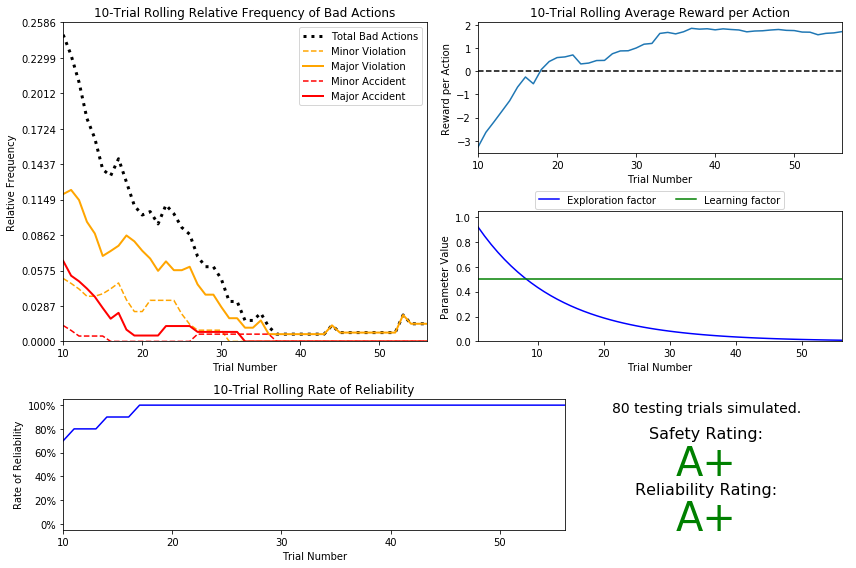

In [78]:
vs.plot_trials('sim_improved-learning.csv')

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**
It would not make sense to implement future rewards because the Smartcab cannot be expected to know the probabilities of all potential successive states; we do not know what the transition functions are and can't be expected to derive them using the vehicle's sensors, which only give it information about the intersection at which the vehicle finds itself.  Secondly, there is no reward, in this implementation of the environment, for arriving at the destination before the deadline.  Therefore, if future rewards are taken into account, the agent could start learning to take the wrong turn, as long as it doesn't get into an accident or commit a violation, so that it can keep getting the reward of 1 for making a valid but incorrect action.  The vehicle could thus maximize its reward by prolonging the trip, rather than ending it early.  

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.